### 데이터 다루기
#### 학습 목표
- 머신러닝 알고리즘에 주입할 데이터를 준비하는 방법 학습
- 데이터 형태가 알고리즘에 미치는 영향 이해
#### 핵심 키워드
지도 학습,비지도 학습, 훈련 세트, 테스트 세트

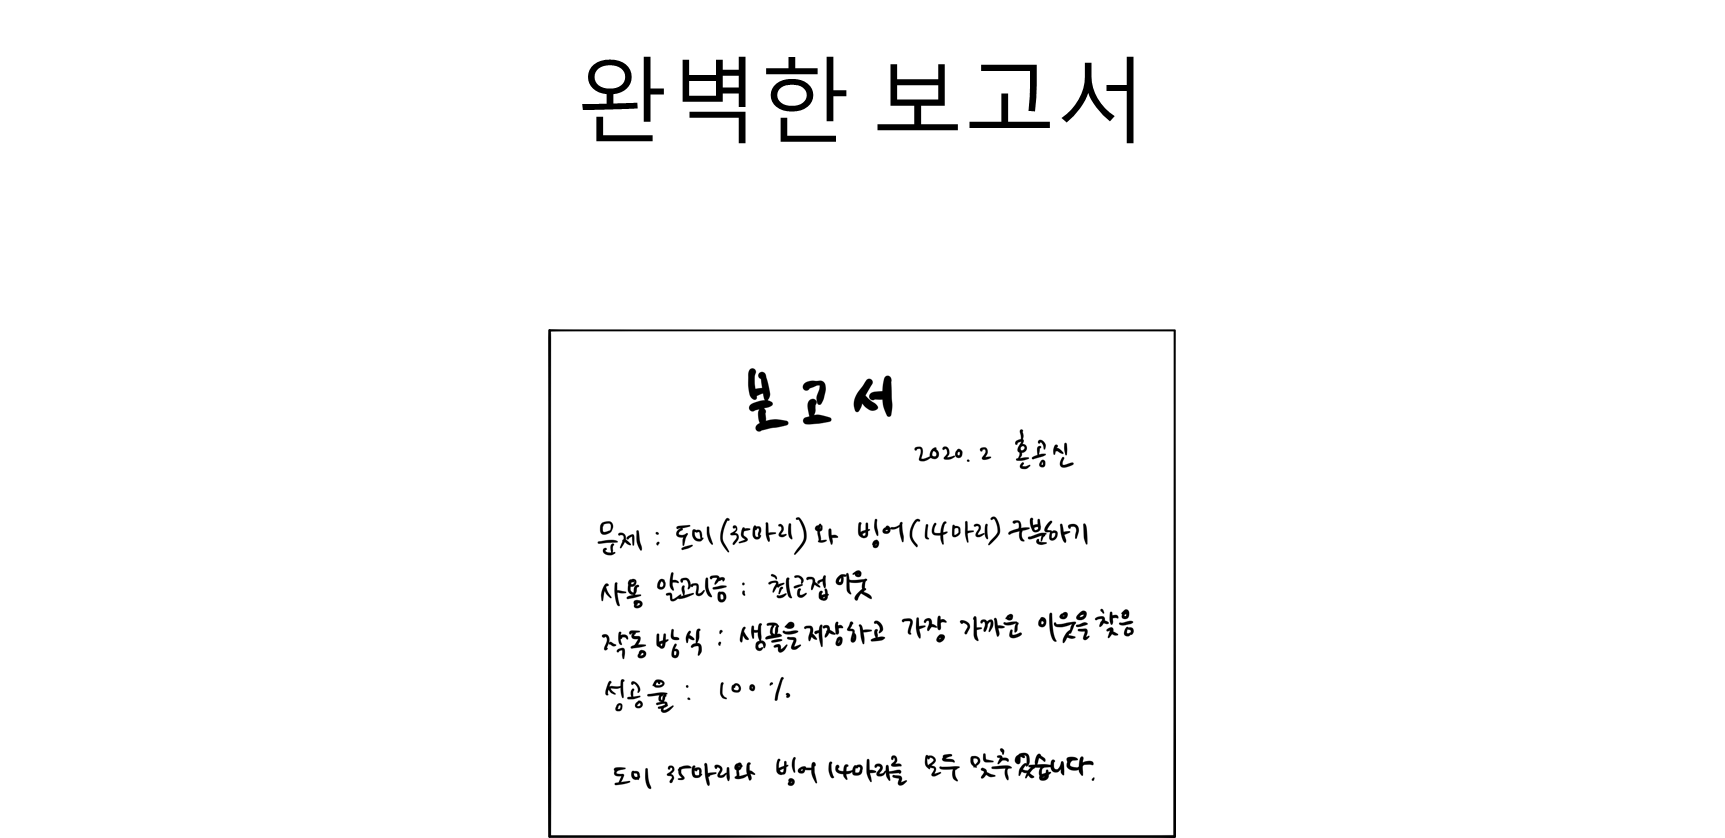

#### 생각해보기
- 도미 35마리와 빙어 14마리를 모주 저장하고 맞추는 거라면 100%가 당연하지 않은가?

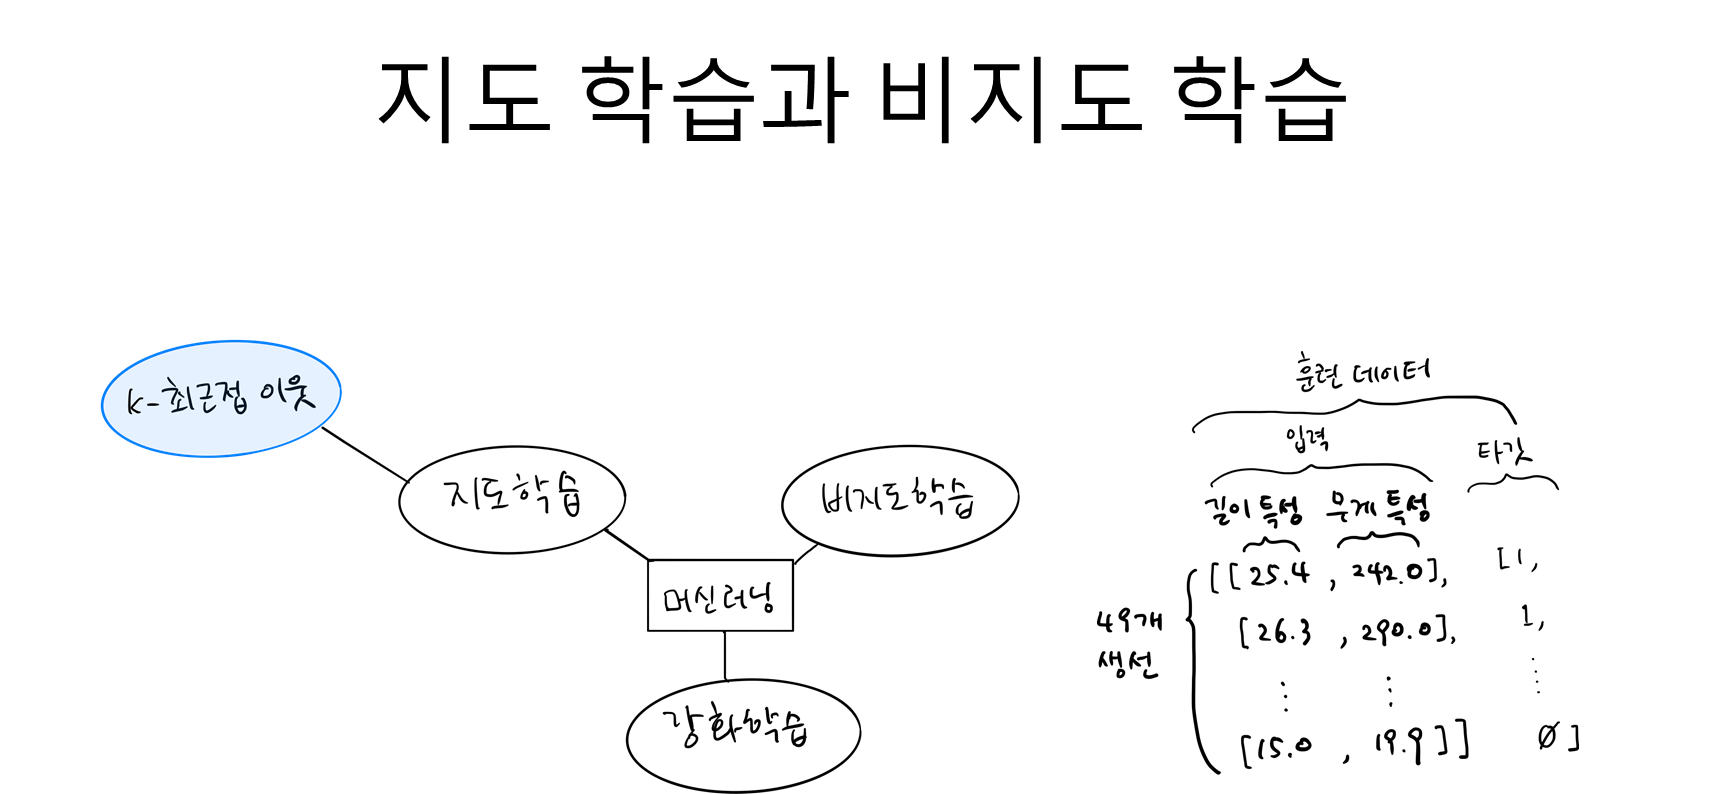

### 지도 학습 supervised learning
- 입력 input, 정답 target
- 입력 input + 정답 target = 훈련 데이터 training data
- 입력 (lenght, weight) => 특성 feature
### 비지도 학습 unsupervised learning
- 정답 target이 없이 입력 input 데이터만 사용 -데이터를 잘 파악하거나 변형하는데 도움이 됨

### 강화 학습 reinforcement learning
- 정답 target이 아니라 알고리즘에 행동한 결과로 얻은 보상을 사용해 학습



#### 훈련 세트와 테스트 세트
- 훈련 세트 : 모델을 훈련시키는 데이터
- 테스트 세트 : 모델을 평가하기 위한 데이터

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

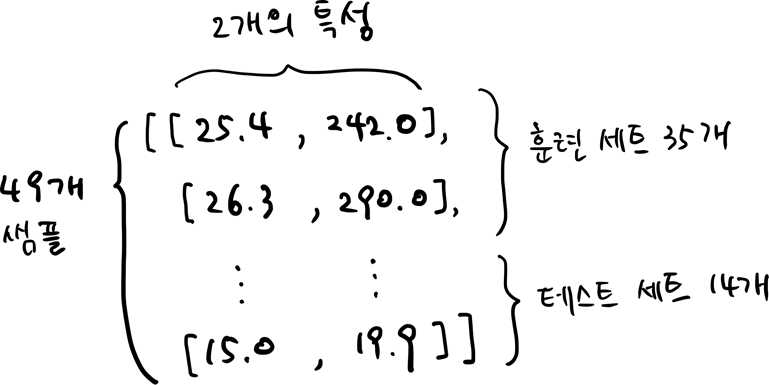

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14


In [3]:
# 분류 모델 객체 생성
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()


In [4]:
print(fish_data[:5])


[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [5]:
print(fish_data[44:])


[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [6]:
# 훈련 세트 생성
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 세트 생성
test_input = fish_data[35:]
test_target = fish_target[35:]

In [8]:
# 모델 훈련
kn.fit(train_input, train_target)

# 테스트 세트로 평가
kn.score(test_input, test_target)

0.0

정확도가 0인 이유는, 훈련 세트와 데이터 세트가 골고루 섞이지 않았기 때문이다. 

### 샘플링 편향 sampling bias

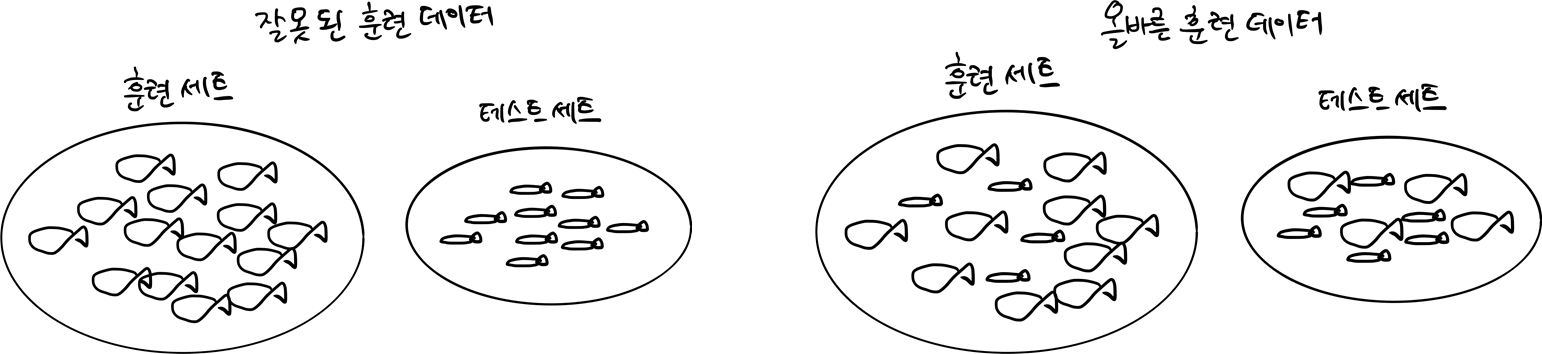

훈련 세와 테스트 세트에 샘플들이 골고루 섞여 있지 않았음

이 친구는 도미를 공부한적이 없었다. 평생 빙어밖에 모르고 살았던 것. 그러니, 데이터 정확도가 0일 수밖에. 


### 넘파이

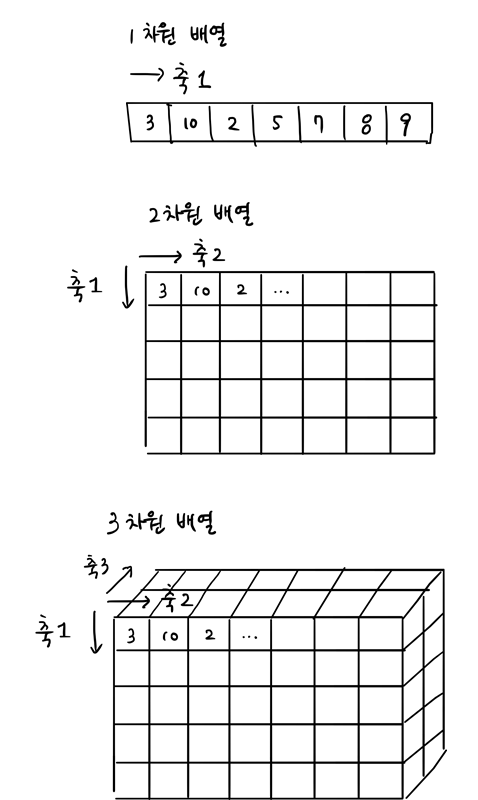

In [9]:
import numpy as np

In [10]:
# list -> numpy array
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [11]:
print(input_arr)


[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


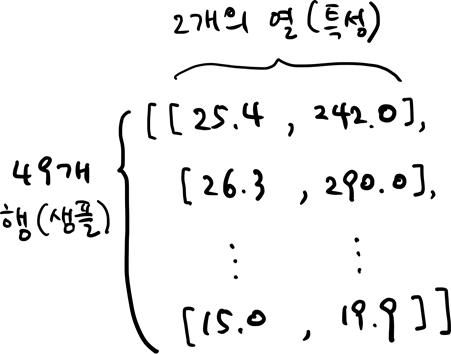

In [12]:
# (샘플 수, 특성 수)
print(input_arr.shape)


(49, 2)


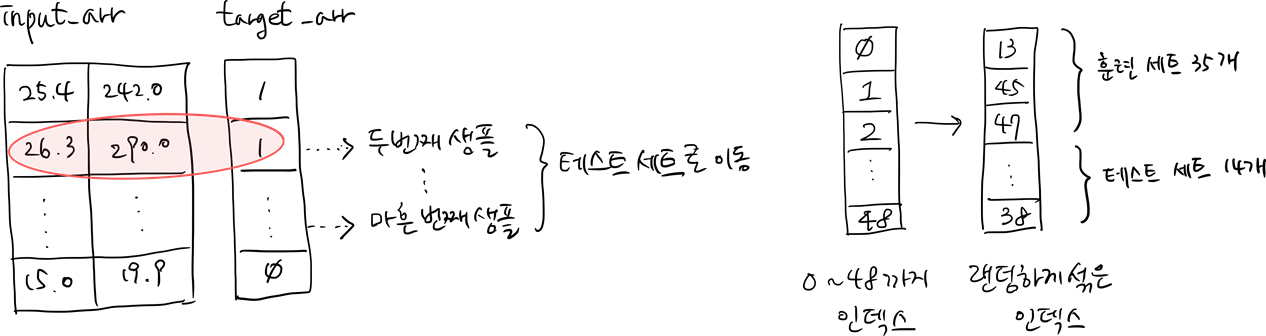

In [13]:
# 랜덤하게 섞은 인덱스
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [14]:
print(index)


[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [16]:
# numpy 배열 인덱싱 array index 
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [17]:
# 랜덤하게 섞은 인덱스로 훈련 세트 생성
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [18]:
print(input_arr[13], train_input[0])


[ 32. 340.] [ 32. 340.]


In [19]:
# 랜덤하게 섞은 인덱스로 테스트 세트 생성
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

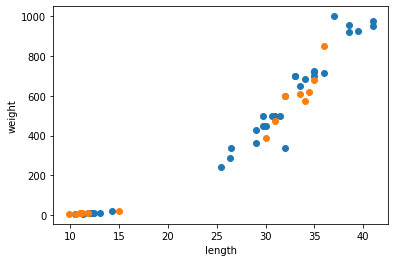

In [20]:
# 데이터 나누고 확인
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
# 훈련
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [22]:
# 평가
kn.score(test_input, test_target)

1.0

In [23]:
# 예측 결과
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [24]:
# 실제 target
test_target


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

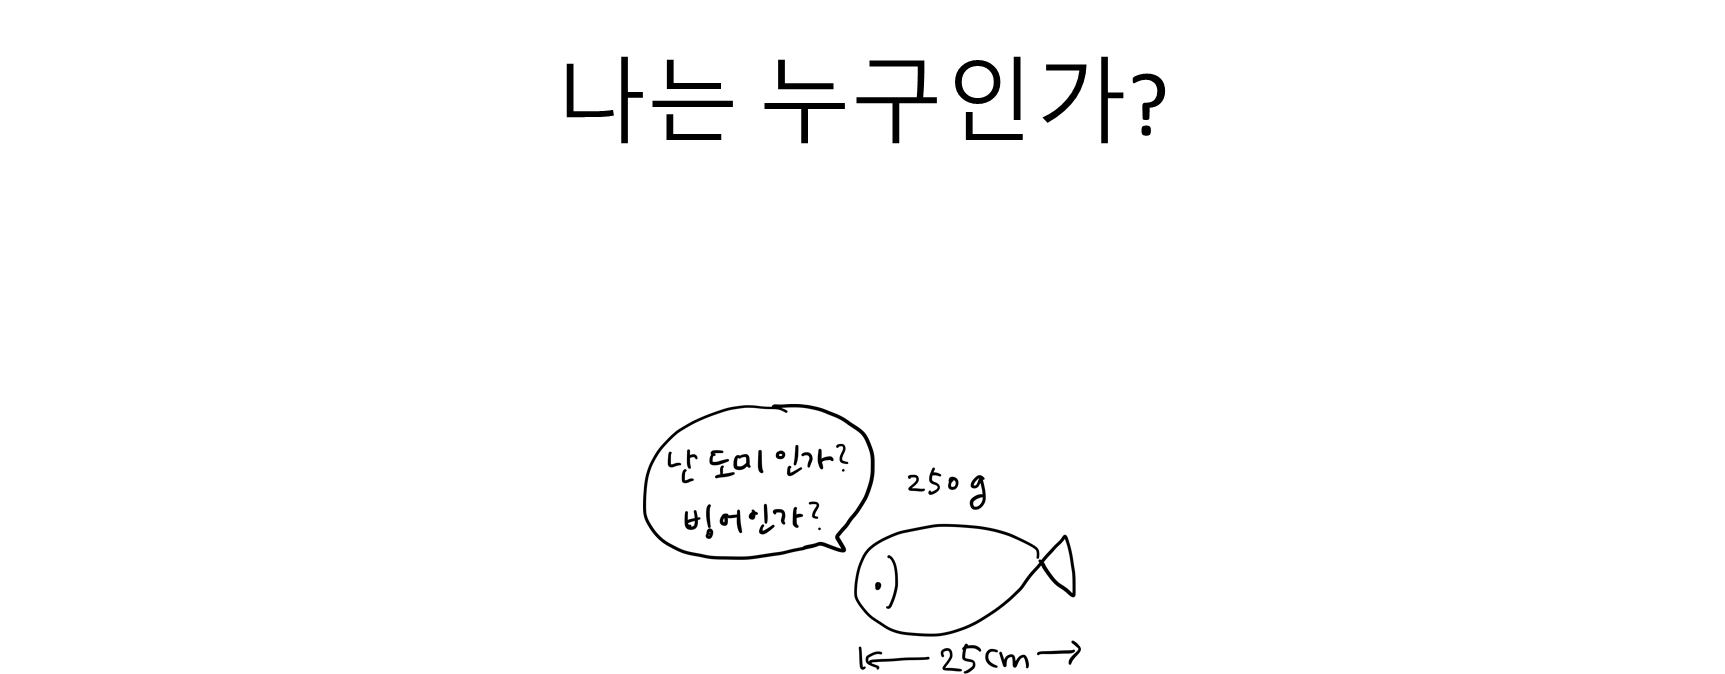

### 데이터 전처리
- 데이터 사용하기 전에 데이터 전처리
- 전처리된 데이터로 훈련 했을 때의 차이점
- 표준점수로 특성 스케일 변환 방법
#### 핵심 키워드
- 데이터 전처리, 표준점수, 브로드캐스팅

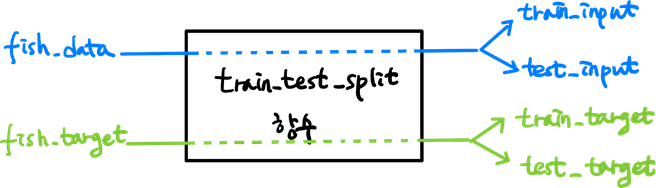

In [51]:
from sklearn.model_selection import train_test_split


In [52]:
# train 75% : test 25% (default)
# test_size 로 비율 조정
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, test_size=0.25, random_state=42)

In [53]:
list(zip([1,2,3], [4,5,6]))


[(1, 4), (2, 5), (3, 6)]

In [54]:
np.column_stack(([1,2,3], [4,5,6]))


array([[1, 4],
       [2, 5],
       [3, 6]])

In [55]:
# input 2차원
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [56]:
print(fish_data[:5])


[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [57]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [60]:
# 2개 특성 합쳐서 2차원으로 만들기
fish_data = np.column_stack((fish_length, fish_weight))

In [61]:
# target 1차원
print(train_target.shape, test_target.shape)

(36,) (13,)


In [62]:
# 편향된 비율 값 3.3:1 => 2.5:1 (정상)
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [63]:
# stratify=target 비율에 맞게 나누어 줌
# classificatio에서는 중요함
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)


In [64]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


#### 수상한 도미 한마리


In [66]:
# 훈련 및 평가 
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [67]:
# 실제 데이터 예측 => 엄청 큰 빙어?
print(kn.predict([[25, 150]]))

[0.]


In [68]:
import matplotlib.pyplot as plt

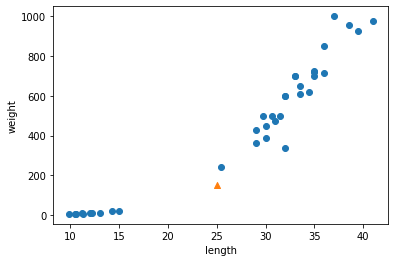

In [69]:
# 실제 데이터 그래프로 확인 
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [70]:
# kneighbors() : 주어진 데이터 가장 가까운 데이터 거리,인덱스 반환
# n_neighbors :  기본값 5
distances, indexes = kn.kneighbors([[25, 150]])
distances, indexes

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[21, 33, 19, 30,  1]], dtype=int64))

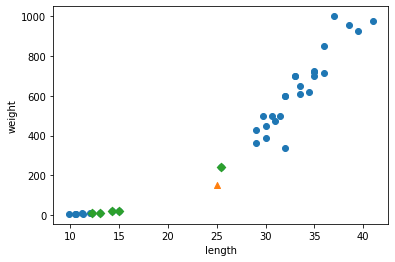

In [76]:
# kneighbors() 그래프로 확인
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

표준화가 꼭 필요하다. or 스케일링이라고 표현하기도 한다.

In [77]:
# kneighbors() input 확인
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [78]:
# kneighbors() target 확인
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [79]:
# kneighbors() 거리 확인
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 기준을 맞춰야 한다. 
- x축은 범위가 좁고 y축은 범위가 넓음
- 스케일 scale이 다름 => 맞춰주어야 함


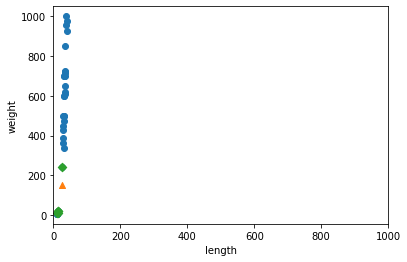

In [80]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

그래서 표준화를 하면, 

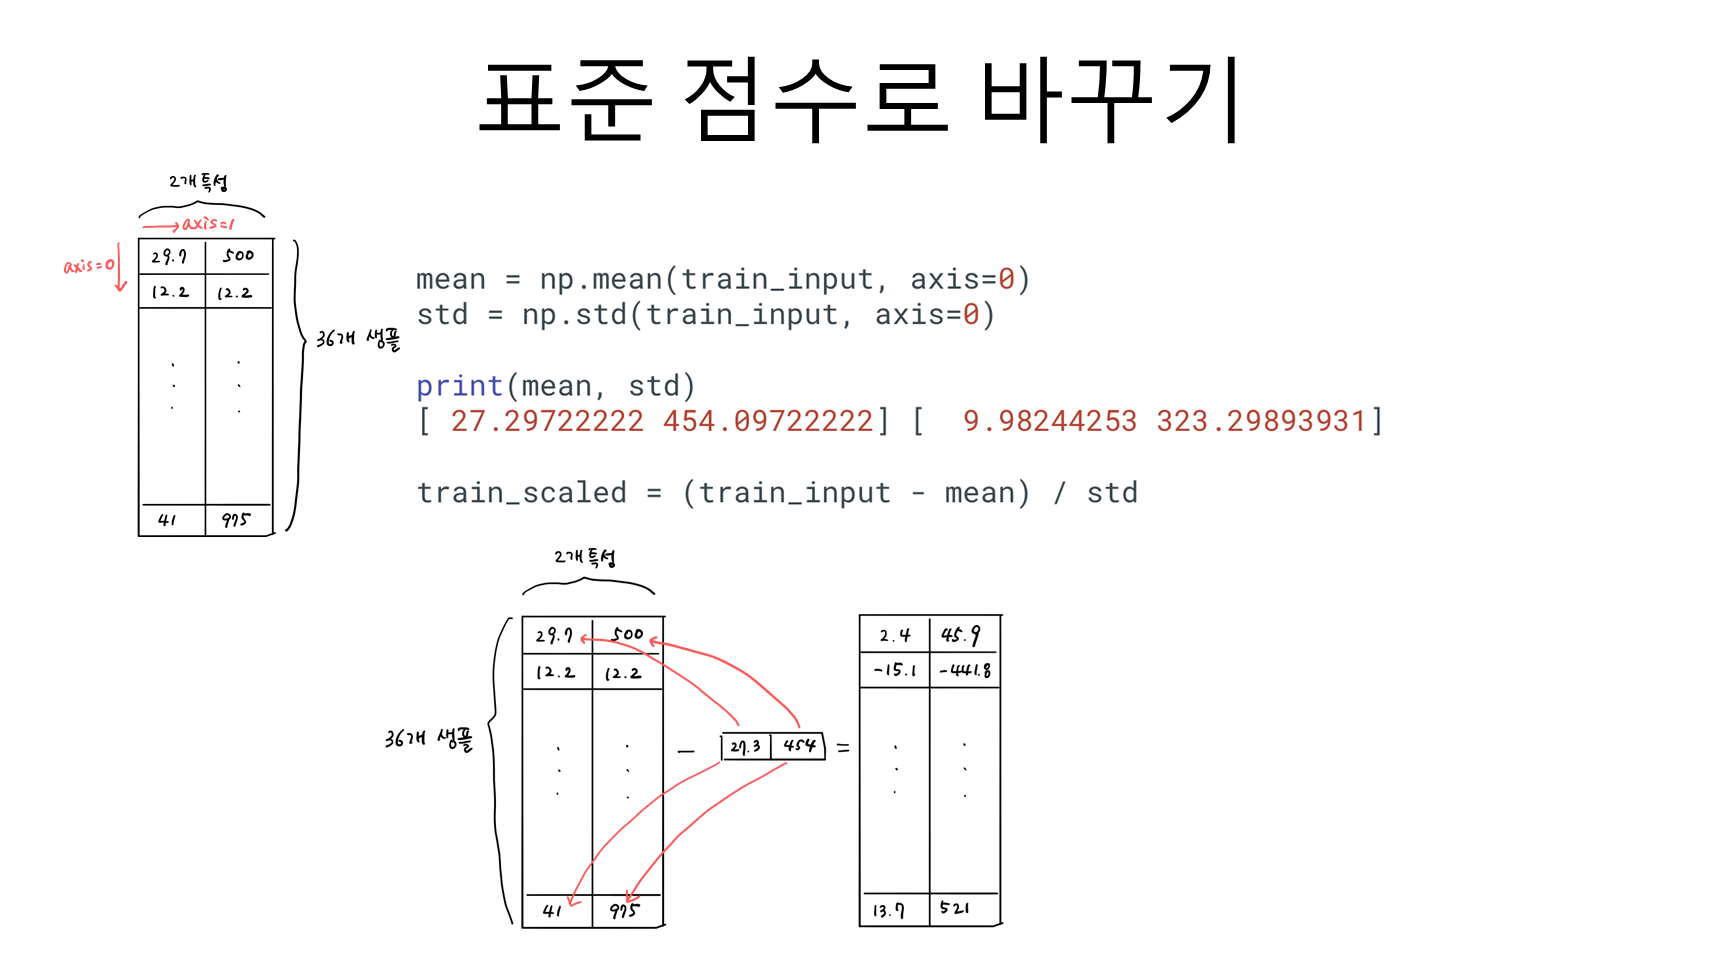

In [81]:
# axis=0 행을 따라 평균, 편차 계산
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [82]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [83]:
# 표준점수 z standard score로 스케일 조정
# 특성값이 평균에서 표준편차의 몇 배만끔 떨어져 있는지를 나타냄
train_scaled = (train_input - mean) / std

전처리 데이터로 모델 훈련하기


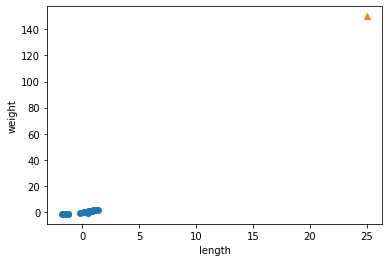

In [84]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [85]:
# 샘플 sacaling
new = ([25, 150] - mean) / std

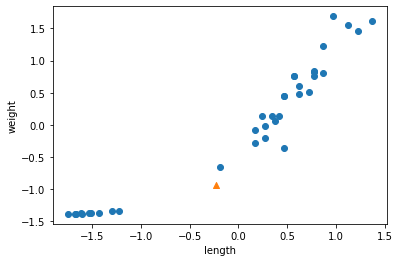

In [86]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [87]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [88]:
# test set scaling
test_scaled = (test_input - mean) / std

In [89]:
# 평가
kn.score(test_scaled, test_target)

1.0

In [90]:
# 예측
print(kn.predict([new]))

[1.]


In [91]:
# 결과 확인
distances, indexes = kn.kneighbors([new])

## ★아래 그래프 확인.

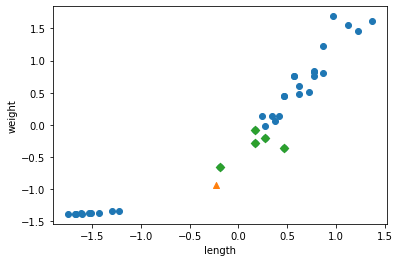

In [92]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


표준화 후 이렇게 정렬 된 데이터가 되었다. 

### 2.4 Model Selection 모듈
- 학습 데이터와 테스트 데이터 세트 분리
- 교차 검증 분할 및 평가
- Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스 제공
#### 학습/테스트 데이터 셋 분리 – train_test_split()
- test_size : 전체 데이터에서 테스트 데이터 크기, 디폴트 0.25%
- train_size : 전체 데이터에서 학습용 데이터 크기, test_size 사용 해서 잘 사용 안함
- shuffle : 데이터 분리전에 데이터를 섞을지 결정, 디폴트 True
- random_state : 동일한 학습/테스트용 데이터 셋트 생성을 위한 seed 값 셋팅
- 학습과 예측을 동일 한 데이터 세트로 수행한 결과

학습과 예측을 동일 한 데이터 세트로 수행한 결과

In [93]:
# 경고 미출력 시키기
import warnings
warnings.filterwarnings(action='ignore')

In [94]:
# 학습과 예측을 동일 한 데이터 세트로 수행한 결과
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121)

In [96]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


### 교차 검증
- 훈련 데이터와 테스트 데이터만으로는 과적합(Overfitting)에 취약함
- 다른 테스트 데이터의 경우 성능이 저하됨
- 데이터 세트를 훈련(학습)-검증(모의고사) / 테스트(수능) 세트로 분리
### K 폴드
- K개의 데이터 폴드 세트를 만들어 K번 만큼 각 폴드 세트 학습과 검증 평가 반복 수행


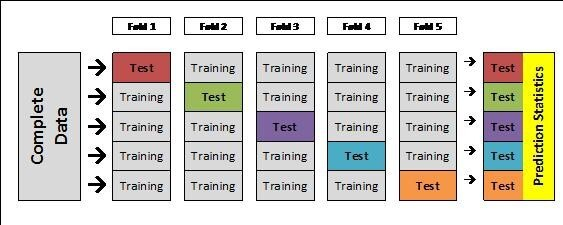

- 훈련 / 테스트 세트 나누기
- 훈련 세트를 K개 fold로 나누기
- 그림은 5개로 폴더로 나눈 경우
- 한 개의 폴드를 다시 K개로 나누고 그중 한개는 검증으로 지정
- 학습 / 검증 평가 평균으로 최적의 모델 생성
- 단점 : 학습 시간이 많이 걸림

### KFold 와 StraifiedKFold 클래스
#### KFold
- 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
- kfold = KFold(n_splits=5)
- 전체 붓꽃 150개 / 학습 4/5 120개 / 검증 1/5 30개
- KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
- kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출


In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5) # 3 또는 10 으로  해보세요
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])


붓꽃 데이터 세트 크기: 150


In [105]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 



#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


### 계층(층화) Stratified K 폴드
- 불균형한(imbalanced) 분포도를 가진 레이블의 데이터 집합을 위한 K 폴드 방식
- 가령 대출 중 사기 대출 데이터 예측에서 총 데이터는 1억건 이중 사기 대출 1000건이라면 비율이 너무 낮아(0.0001%) 정상/사기 비율을 반영하지 못하는 분리가 될 수 있음
- 불균형한(imbalanced) 분포도 원본 데이터와 유사한 분포를 가진 세트를 만들 시 사용
- 원본 데이터와 레이블 분포를 먼저 고려 한 뒤 분배 함


In [106]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()


0    50
1    50
2    50
Name: label, dtype: int64

In [107]:
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [110]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())


## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [111]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


In [112]:
# shuffle=True로도 가능
kfold = KFold(n_splits=3, shuffle=True)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())


## 교차 검증: 1
학습 레이블 데이터 분포:
 0    35
2    34
1    31
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    19
2    16
0    15
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    38
0    31
2    31
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    19
2    19
1    12
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 2    35
0    34
1    31
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    19
0    16
2    15
Name: label, dtype: int64


#### 간단 교차 검증 cross_val_score( )
- 교차 검증을 편리하게 수행
- K Fold의 폴드 세트 설정 -> for loop 반복 학습 --> 평가 과정을 한꺼번에 수행
- cross_val_score(알고리즘,피처데이터,레이블데이터,scoring예측평가지표,cv교차검층폴드수)
- 내부적으로 StratifiedKFold 사용 됨


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))


교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### 교차 검증과 최적 하이퍼 파라미터 튜닝 GridSearchCV
#### 알고리즘 하이퍼 파라미터
- 머신러닝 알고리즘을 구성하는 주요 구성 요소
- 이 값을 조정해 알고리즘 성능 개선
- 파라미터를 순차적으로 바꿔 가면서 최적의 성능을 내는 조합 찾기를 수행
- GridSearchCV는 교차 검증을 기반으로 최적의 값을 찾아 줌
- 수행시간이 상대적으로 오래 걸림
#### GridSearchCV 주요 파라 미터
- estimator : 분류, 회귀 알고리즘
- param_grid : 튜닝을 위한 파라미터를 key 갖는 dict 값
- scoring : 예측 평가 방법 지정, 정확도라면 accuacy
- cv : 교처 검증 폴드 수
- refit : 최적의 하이퍼 파라미터를 찾은 후 해당 파라미터로 재학습, 디폴트 True
### DecisionTreeClassifier 결정트리 알고리즘에 적용해 보기
- max_depth, min_samples_split : DecisionTreeClassifier의 중요 하이퍼 파라미터


In [115]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정 (3 x 2 = 6 번 진행)
parameters = {'max_depth':[1,2,3,4], 'min_samples_split':[2,3]}


In [116]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,7,0.700,0.7,0.700
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,7,0.700,0.7,0.700
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.950
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.950
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.950
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.950
6,"{'max_depth': 4, 'min_samples_split': 2}",0.950000,5,0.925,1.0,0.925
7,"{'max_depth': 4, 'min_samples_split': 3}",0.950000,5,0.925,1.0,0.925


In [117]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))


GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [118]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))


테스트 데이터 세트 정확도: 0.9667
